In [1]:
# Imports
import mglearn
import matplotlib.pyplot as plt

## Supervised Machine Learning Algorithms
### Sample Datasets

We'll start with the `forge` dataset, which is a synthetic two-class classification dataset.

X.shape: (26, 2)


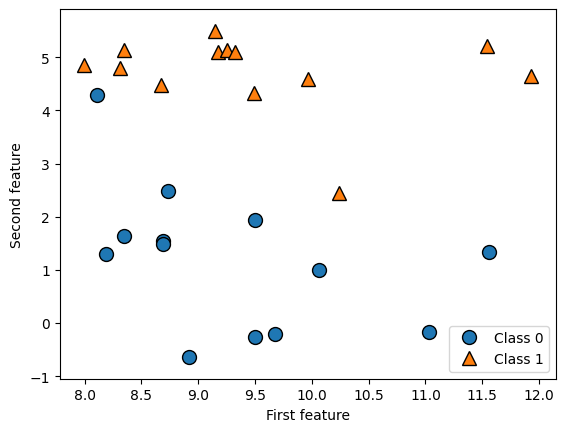

In [2]:
# Generate dataset
X, y = mglearn.datasets.make_forge()
# Plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")

print("X.shape: {}".format(X.shape))

To illustrate regression algorithms, we will use the synthetic `wave` dataset.

Text(0, 0.5, 'Target')

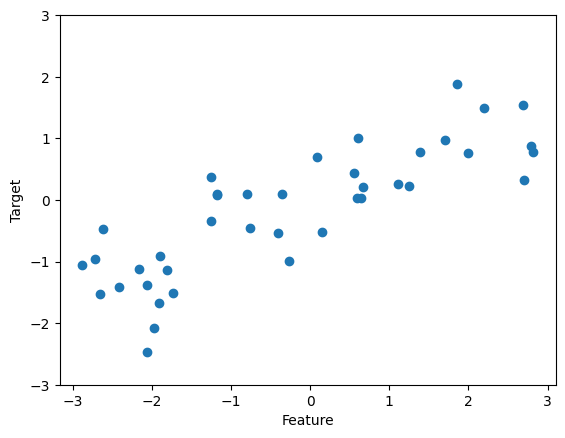

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

### K-Nearest Neighbors

This is one of the simplest machine learning algorthms. Building the model consists only of storing the training dataset. To make a prediction for a new data point, the algorithm finds the closest data points in the training dataset - its "nearest neighbors"

When considering more than one neighbor, we use `voting` to assign a label. This means that for each test point, we count how many nighbors belong to class 0 and how many belong to class 1. We then assign the class that is more frequent.

Now, let's look at how we can apply the k-nearest neightbors algorithm using `scikit-learn`. First, we split our data into a training and a test set so we can evaluate generalization performance.

In [9]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Next, we import and instantiate the class. This is when we can set parameters, like the number of neighbors to use. Here, we set it to 3.

In [10]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

Now, we fit the classifier using the training set. For `KNeighborsClassifier`, this means storing the dataset, so we can compute neighbors during prediction.

In [11]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

To make predictions on the test data, we call the `predict` method. For each point in the test set, this computes its nearest neighbors in the training set and finds the most common class among these.

In [12]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


To evaluate how well our model generalizes, we can call the `score` method with the test data together with the test labels

In [13]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


#### Analyzing KNeighborsClassifier
For 2D datasets, we can also illustrate the prediction for all possible test points in the xy-plane. The following code produces the visualization of the `decision boundaries` for one, three, and nine neighbors.

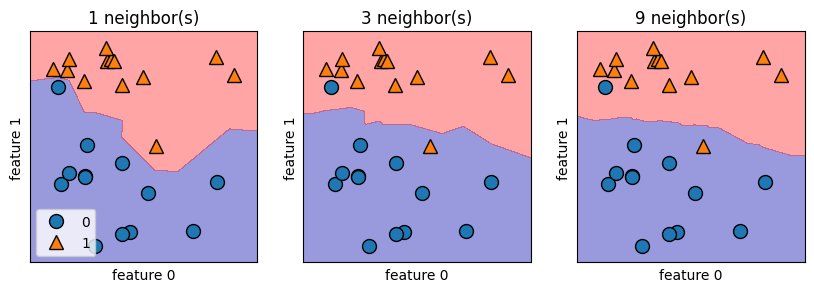

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")

axes[0].legend(loc=3)